# Library

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,image_processing
%reload_ext autoreload

# contours

## **cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

If you're using OpenCV 3.X replace line 12 with:

_, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)


## Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..

# simple contour detection

Number of Contours found = 4


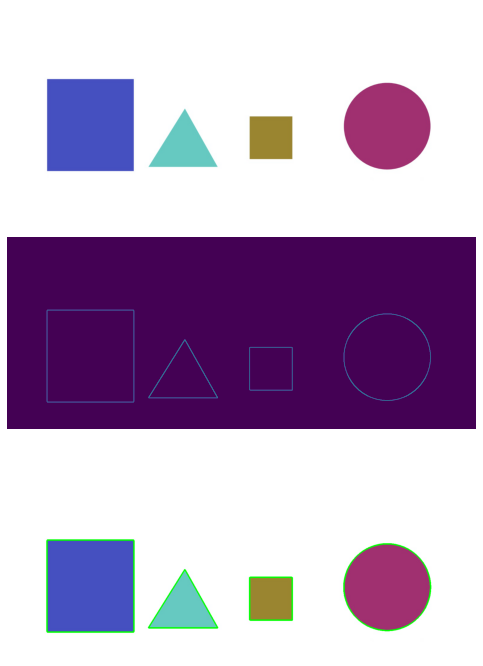

In [2]:
contours, hierarchy,image = image_processing.contours(r'E:\gitlab\machine-learning\dataset\images\bunchofshapes.jpg'
                          ,types='simple')

# simple contour detection with sorting

Number of Contours found = 4
Contor Areas before sorting: [20587.5, 22900.5, 66581.5, 90222.0]
Contor Areas after sorting: [90222.0, 66581.5, 22900.5, 20587.5]
Center moments: [(280, 399), (1277, 403), (593, 474), (886, 442)]


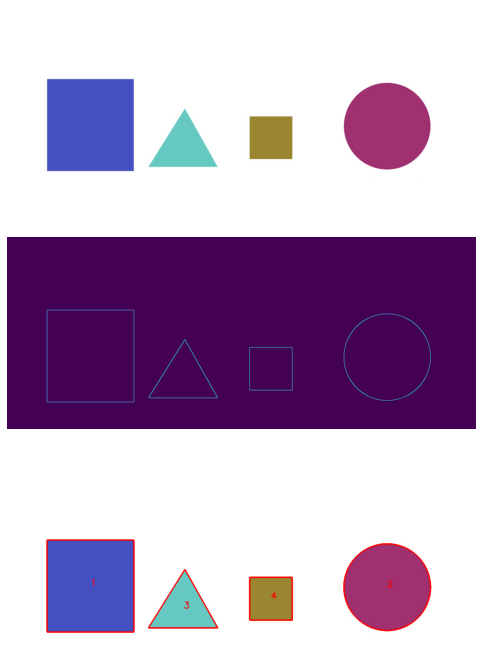

In [21]:
contours, hierarchy,image = image_processing.contours(r'E:\gitlab\machine-learning\dataset\images\bunchofshapes.jpg'
                          ,types='simple',sort_area=True,sort_position=False)

# approximating contours

for noisy image, we can use approximation contours

## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


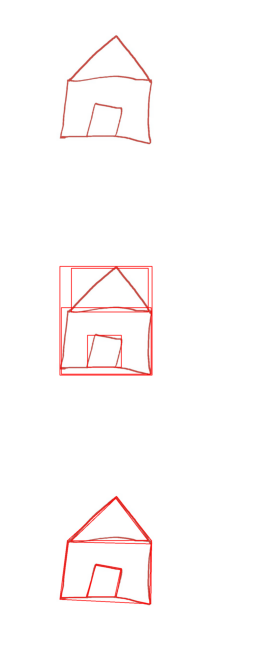

In [11]:
contours, hierarchy,image = image_processing.approx_contours(r'E:\gitlab\machine-learning\dataset\images\house.jpg'
                          ,types='simple',accuracy=0.03)

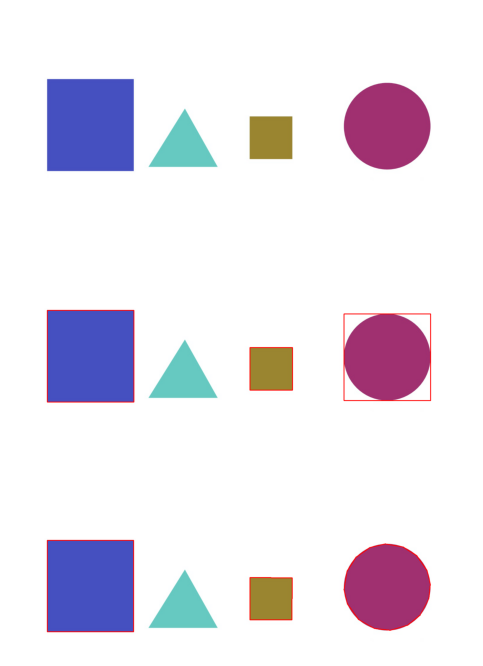

In [12]:
contours, hierarchy,image = image_processing.approx_contours(r'E:\gitlab\machine-learning\dataset\images\bunchofshapes.jpg'
                          ,types='simple',accuracy=0.01)

# Convex hull

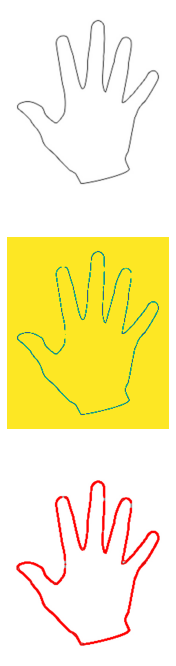

In [18]:
contours, hierarchy,image = image_processing.area_convex_hull(r'E:\gitlab\machine-learning\dataset\images\hand.jpg'
                                                              ,types='All')

# Matching contour

Center moments: [(390, 375), (590, 579), (608, 176), (234, 165)]
Matching value: [0.13081816783853514, 0.1590200533978871, 0.1498791568252558, 0.07094034474475601]


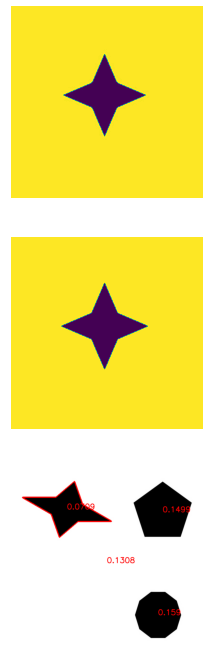

In [42]:
image_source, image_match,moments,match = image_processing.matching(image_source = r'E:\gitlab\machine-learning\dataset\images\4star.jpg'
                                                     ,image_match=r'E:\gitlab\machine-learning\dataset\images\shapestomatch.jpg',
                                                     types='simple',match_treshold= 0.15)